In [2]:

from xenopict import shaded_svg, XenopictDrawer

%load_ext autoreload
%autoreload 2

from rdkit import Chem
import rdkit.Chem.rdPartialCharges
from IPython.display import SVG
import numpy as np


diclofenac = mol = rdkit.Chem.MolFromSmiles('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')
rdkit.Chem.rdPartialCharges.ComputeGasteigerCharges(mol)
shading = np.array([a.GetDoubleProp("_GasteigerCharge")  for a in mol.GetAtoms()])
shading = shading / abs(shading).max()  # partial charge (scaled to [-1, 1])



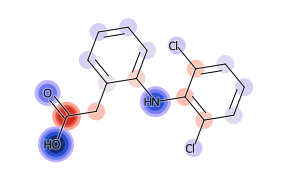

In [3]:
drawer = XenopictDrawer(mol)
drawer.shade(shading)
drawer.halo()
svg = str(drawer)    
SVG(svg)


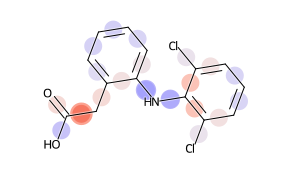

In [4]:
a1 = [b.GetBeginAtomIdx() for b in mol.GetBonds()]
a2 = [b.GetEndAtomIdx() for b in mol.GetBonds()]
bshading = (shading[a1] + shading[a2])  / 2

drawer = XenopictDrawer(mol)
drawer.shade(bond_shading=(a1, a2, bshading))
drawer.halo()
svg = str(drawer)    
SVG(svg)

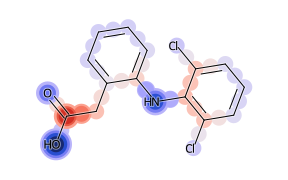

In [5]:

drawer = XenopictDrawer(mol)
drawer.shade(shading, bond_shading=(a1, a2, bshading))
drawer.halo()
svg = str(drawer)    
SVG(svg)

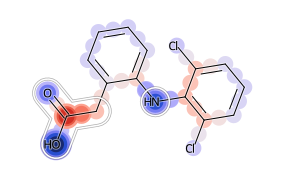

In [6]:
drawer.mark_substructure([0,1,2,3, 10])
svg = str(drawer)    
SVG(svg)


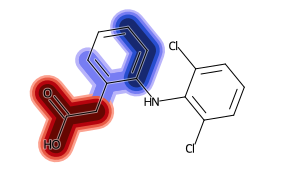

In [7]:
drawer = XenopictDrawer(mol)
drawer.shade_substructure([[0,1,2,3], [7,8,9], [3,4,5,9]], [1, -1, -0.5])
drawer.halo()
svg = str(drawer)    
SVG(svg)
